G2M insight for Cab Investment firm

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.
Objective : Provide actionable insights to help XYZ firm in identifying the right company for making 
investment
Dataset
There have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018. Below are the list of datasets which are provided for the analysis:
Cab_Data.csv – this file includes details of transaction for 2 cab companies
Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details
Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode
City.csv – this file contains list of US cities, their population and number of cab users

Hypothesis:
1-The number of transactions is related with the month of the year.
2-There exists correlation between KM_travelled and the Price_Charged.
3-There exists correlation between Price_Charged and the Cost_of_Trip.
4-There exists correlation between Population and the Price_Charged.
5-There exists correlation between Users and the Price_Charged.
The answers for the above hypothesis will be found in the following analysis.

In [41]:
#G2M insight for Cab Investment firm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import plotly
from scipy import stats
import datetime




In [7]:
cab_data = pd.read_csv("Desktop/Cab_Data.csv")
CustomerID_data=pd.read_csv("Desktop/Customer_ID.csv")
TransactionID_data=pd.read_csv("Desktop/Transaction_ID.csv")
City_data=pd.read_csv("Desktop/City.csv")

cab_data.head()



,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [8]:
cab_data.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
359387,10440101,08-01-2018,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,04-01-2018,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,05-01-2018,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,05-01-2018,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480
359391,10440107,02-01-2018,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192


In [9]:
TransactionID_data.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [10]:
TransactionID_data.tail()

,Transaction ID,Customer ID,Payment_Mode
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card
440097,10440108,51587,Card


In [11]:
CustomerID_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [12]:
CustomerID_data.tail()

,Customer ID,Gender,Age,Income (USD/Month)
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454
49170,39761,Female,32,10128


In [13]:
City_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [14]:
City_data.tail()

,City,Population,Users
15,SACRAMENTO CA,"545,776","7,044"
16,PITTSBURGH PA,"542,085","3,643"
17,WASHINGTON DC,"418,859","127,001"
18,NASHVILLE TN,"327,225","9,270"
19,BOSTON MA,"248,968","80,021"


In [15]:
# Check the shape of whole dataset
print("shape of Cab_Data", cab_data.shape)
print("shape of Customer_ID", CustomerID_data.shape)
print("shape of Transaction_ID", TransactionID_data.shape)
print("shape of City Data", City_data.shape)

shape of Cab_Data (359392, 7)
shape of Customer_ID (49171, 4)
shape of Transaction_ID (440098, 3)
shape of City Data (20, 3)


In [15]:
# check the basic information 
print(cab_data.info())
print(CustomerID_data.info())
print(TransactionID_data.info())
print(City_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int6

In [11]:
TransactionID_data.isnull().sum() + TransactionID_data.isna().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [12]:
cab_data.isnull().sum() + cab_data.isna().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [13]:
CustomerID_data.isnull().sum() + CustomerID_data.isna().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [14]:
City_data.isnull().sum() + City_data.isna().sum()

City          0
Population    0
Users         0
dtype: int64

In [16]:
for col in cab_data.columns:
    if ' ' in col:
        cab_data = cab_data.rename(columns={col:col.replace(' ','_')})
for col in TransactionID_data.columns:
    if ' ' in col:
        TransactionID_data = TransactionID_data.rename(columns={col:col.replace(' ','_')})
for col in CustomerID_data.columns:
    if ' ' in col:
        CustomerID_data = CustomerID_data.rename(columns={col:col.replace(' ','_')})
cab_data['Date_of_Travel'] = pd.to_datetime(cab_data['Date_of_Travel'])

months=[]
years =[]
for i in range(len(cab_data['Date_of_Travel'])):
    months.append(cab_data['Date_of_Travel'][i].month)
    years.append(cab_data['Date_of_Travel'][i].year)
cab_data['Month'] = months
cab_data['Year'] = years

cab_data.drop('Date_of_Travel', axis=1, inplace=True)

In [17]:
PinkCab = cab_data[cab_data['Company']=='Pink Cab']
YellowCab = cab_data[cab_data['Company']=='Yellow Cab']
cab_data.head()


,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,8,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,6,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,7,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,3,2016


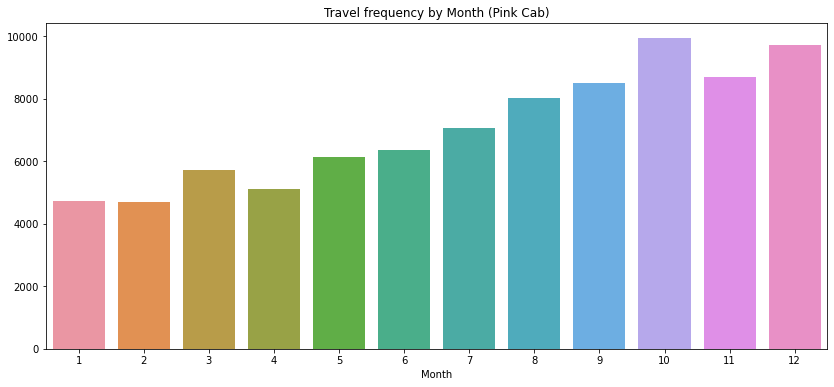

In [18]:
data_p_0 = cab_data[cab_data.Company=='Pink Cab'].groupby(['Month']).Transaction_ID.count()
data_p_0

plt.figure(figsize=(14,6))
sns.barplot(x=data_p_0.index,y=data_p_0.values)
plt.title('Travel frequency by Month (Pink Cab)')
plt.show()


In [ ]:
#It is seen that the greater travel frequency for the Pink Cab is reached on October.

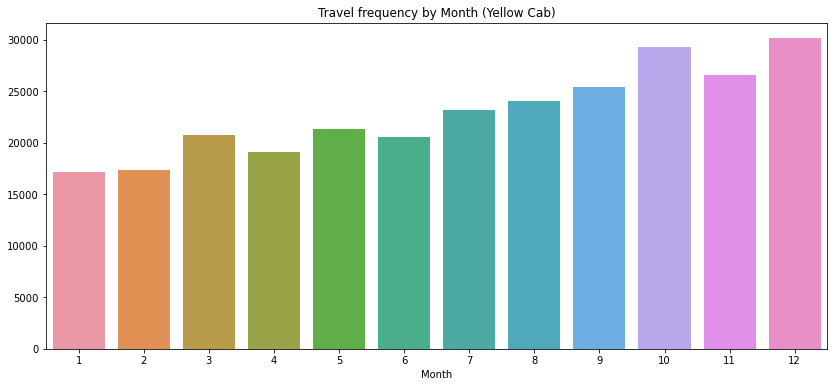

In [33]:
data_y_0 = cab_data[cab_data.Company=='Yellow Cab'].groupby(['Month']).Transaction_ID.count()
data_y_0

plt.figure(figsize=(14,6))
sns.barplot(x=data_y_0.index,y=data_y_0.values)
plt.title('Travel frequency by Month (Yellow Cab)')
plt.show()


In [ ]:
#It is seen that the greater travel frequency for the Yellow Cab is reached on December which is the holidays month. 

In [19]:
#Creating Master Data
master_data = cab_data.set_index([cab_data.index,'Transaction_ID']).join(TransactionID_data.set_index(['Transaction_ID']))

master_data = master_data.set_index([master_data.index,'Customer_ID']).join(CustomerID_data.set_index(['Customer_ID']))

master_data = master_data.set_index([master_data.index,'City']).join(City_data.set_index(['City']))

 
master_data.head()


,,,,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
,Transaction_ID,Customer_ID,City,,,,,,,,,,,,
0,10000011,29290,ATLANTA GA,Pink Cab,30.45,370.95,313.635,8,2016,Card,Male,28,10813,"814,885","24,701"
1,10000012,27703,ATLANTA GA,Pink Cab,28.62,358.52,334.854,6,2016,Card,Male,27,9237,"814,885","24,701"
2,10000013,28712,ATLANTA GA,Pink Cab,9.04,125.20,97.632,2,2016,Cash,Male,53,11242,"814,885","24,701"
3,10000014,28020,ATLANTA GA,Pink Cab,33.17,377.40,351.602,7,2016,Cash,Male,23,23327,"814,885","24,701"
4,10000015,27182,ATLANTA GA,Pink Cab,8.73,114.62,97.776,3,2016,Card,Male,33,8536,"814,885","24,701"


In [20]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 359392 entries, (0, 10000011, 29290, 'ATLANTA GA') to (359391, 10440107, 52917, 'WASHINGTON DC')
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Company             359392 non-null  object 
 1   KM_Travelled        359392 non-null  float64
 2   Price_Charged       359392 non-null  float64
 3   Cost_of_Trip        359392 non-null  float64
 4   Month               359392 non-null  int64  
 5   Year                359392 non-null  int64  
 6   Payment_Mode        359392 non-null  object 
 7   Gender              359392 non-null  object 
 8   Age                 359392 non-null  int64  
 9   Income_(USD/Month)  359392 non-null  int64  
 10  Population          359392 non-null  object 
 11  Users               359392 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 60.3+ MB


In [21]:
master_data = master_data.reset_index()
master_data = master_data.rename(columns={'Income_(USD/Month)':'Income'})
city_users = master_data.groupby('City').Users.count()
city_users

city_yellow = master_data[master_data.Company=='Yellow Cab'].groupby('City').Transaction_ID.count()
city_yellow


City
ATLANTA GA         5795
AUSTIN TX          3028
BOSTON MA         24506
CHICAGO IL        47264
DALLAS TX          5637
DENVER CO          2431
LOS ANGELES CA    28168
MIAMI FL           4452
NASHVILLE TN       1169
NEW YORK NY       85918
ORANGE COUNTY      2469
PHOENIX AZ         1200
PITTSBURGH PA       631
SACRAMENTO CA      1033
SAN DIEGO CA       9816
SEATTLE WA         5265
SILICON VALLEY     4722
TUCSON AZ          1132
WASHINGTON DC     40045
Name: Transaction_ID, dtype: int64

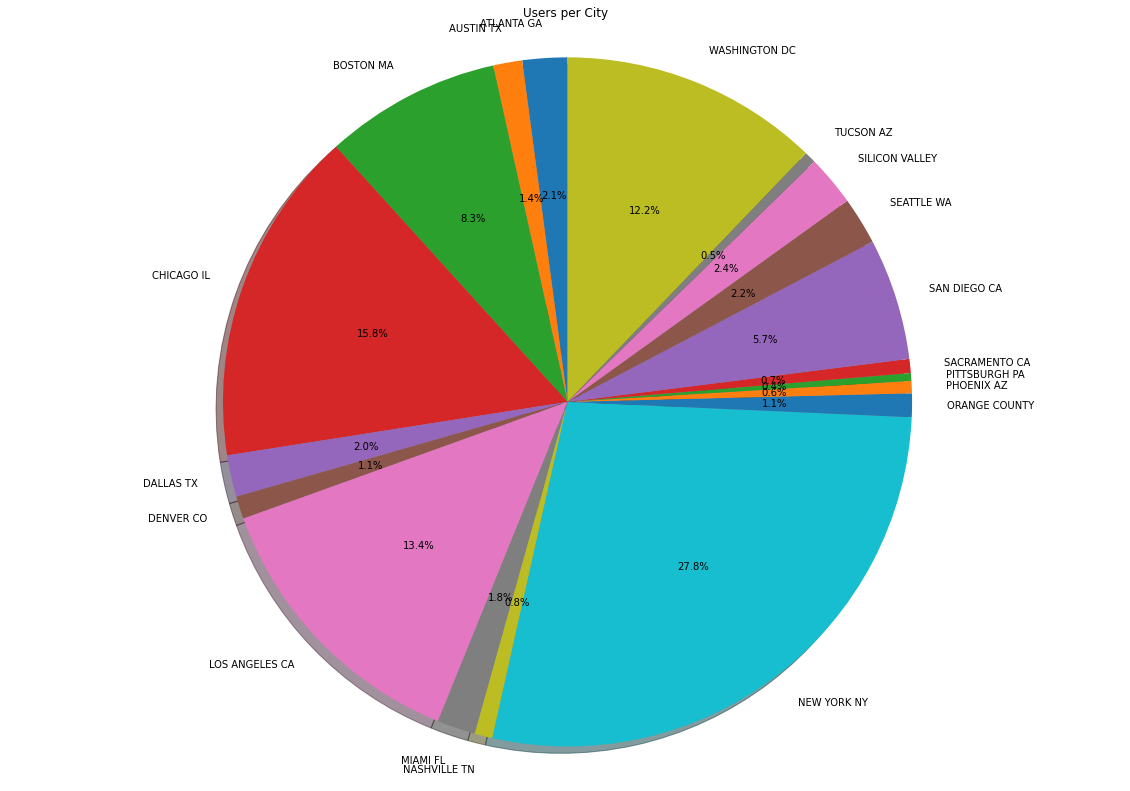

In [22]:
figp, axp = plt.subplots(figsize=(20,14))
axp.pie(city_users.values , labels=city_users.index, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')
plt.title('Users per City')
plt.show()


In [ ]:
#From this pie chart it is seen that the cities with the greater number of users are New York, Los Angeles, Chicago, Boston, Washington.

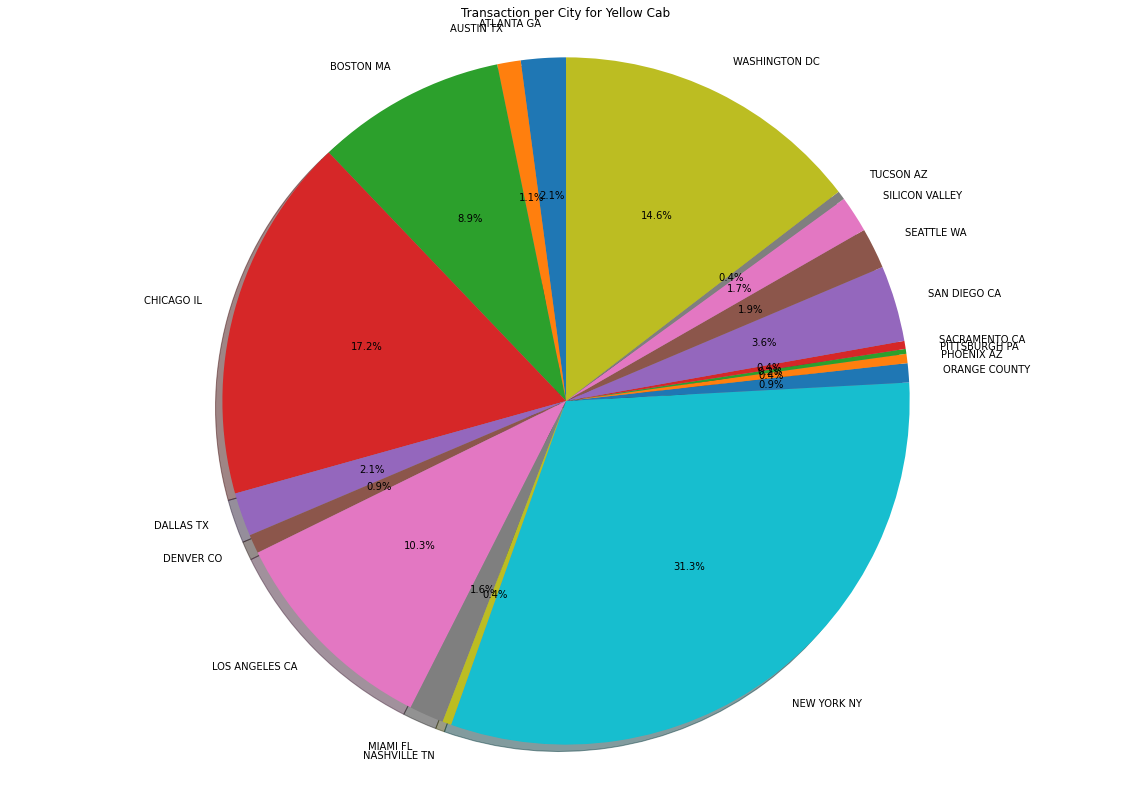

In [23]:
figp, axp = plt.subplots(figsize=(20,14))
axp.pie(city_yellow.values , labels= city_yellow.index,  autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Transaction per City for Yellow Cab')
plt.show()


In [ ]:
#From this pie chart it is seen that the cities with more transactions for the Yellow Cab are New York, Chicago, Washington.

In [24]:
city_pink = master_data[master_data.Company=='Pink Cab'].groupby('City').Transaction_ID.count()
city_pink


City
ATLANTA GA         1762
AUSTIN TX          1868
BOSTON MA          5186
CHICAGO IL         9361
DALLAS TX          1380
DENVER CO          1394
LOS ANGELES CA    19865
MIAMI FL           2002
NASHVILLE TN       1841
NEW YORK NY       13967
ORANGE COUNTY      1513
PHOENIX AZ          864
PITTSBURGH PA       682
SACRAMENTO CA      1334
SAN DIEGO CA      10672
SEATTLE WA         2732
SILICON VALLEY     3797
TUCSON AZ           799
WASHINGTON DC      3692
Name: Transaction_ID, dtype: int64

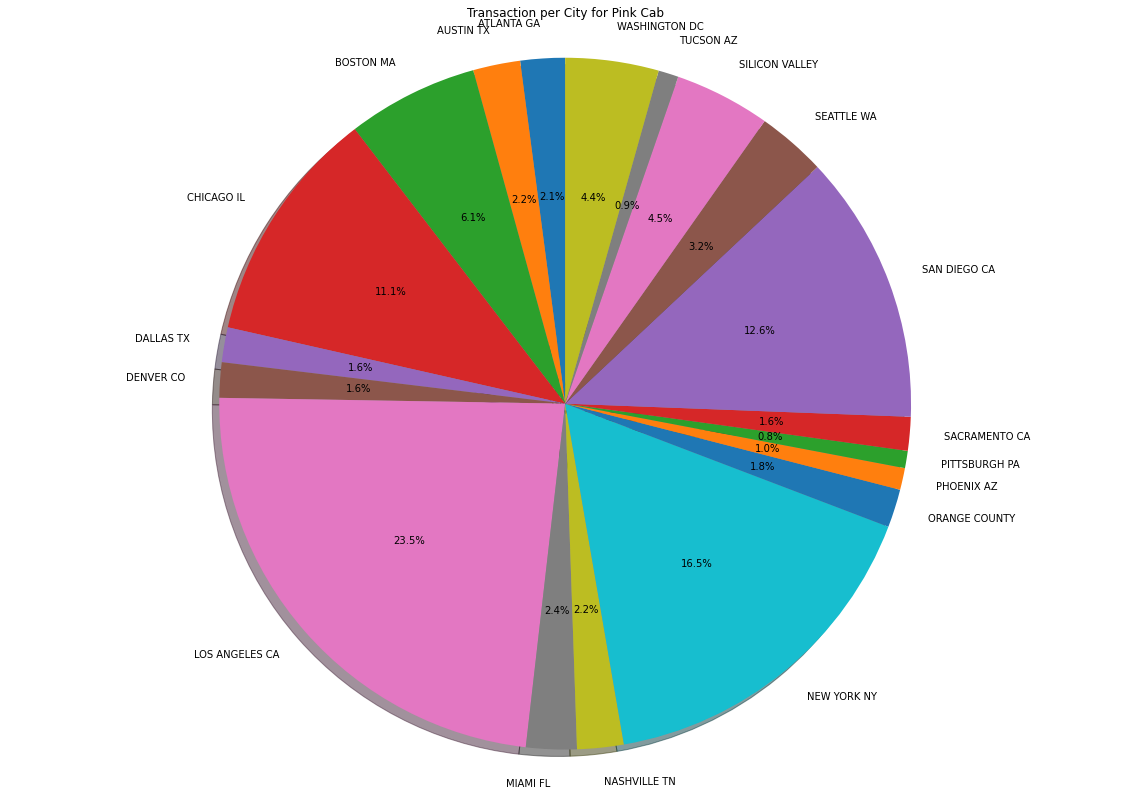

In [25]:
figp, axp = plt.subplots(figsize=(20,14))
axp.pie(city_pink.values , labels= city_pink.index,  autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Transaction per City for Pink Cab')
plt.show()


In [ ]:
#From this pie chart it is seen that the cities with more transactions for the Pink Cab are New York, Los Angeles, San Diego CA.

In [26]:
gender_yellow=master_data[master_data.Company=='Yellow Cab'].groupby('Gender').Price_Charged.mean()
gender_yellow


Gender
Female    454.571538
Male      460.821326
Name: Price_Charged, dtype: float64

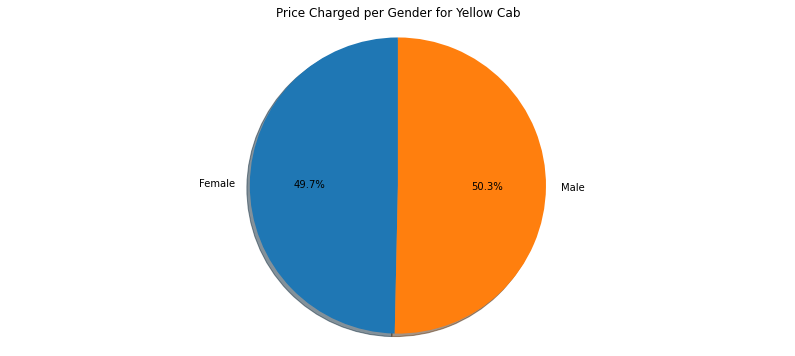

In [27]:
figp, axp = plt.subplots(figsize=(14,6))
axp.pie(gender_yellow.values ,labels= gender_yellow.index, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Price Charged per Gender for Yellow Cab')
plt.show()


In [29]:
gender_pink=master_data[master_data.Company=='Pink Cab'].groupby('Gender').Price_Charged.mean()
gender_pink


Gender
Female    310.624823
Male      310.940547
Name: Price_Charged, dtype: float64

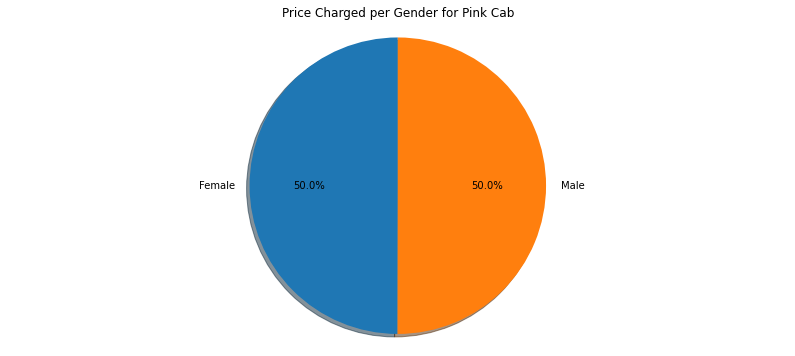

In [30]:
figp, axp = plt.subplots(figsize=(14,6))
axp.pie(gender_pink.values, labels=gender_pink.index,  autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Price Charged per Gender for Pink Cab')
plt.show()



In [ ]:
#Yellow Cab charge less from Female Customers whereas Pink Cab charges same for both Male and Female Customers.


In [31]:
# Splitting MasterData into two dataset for every Cab Firm to analyze them individually.

Pink_Data = master_data [master_data['Company'] == 'Pink Cab'] 
Yellow_Data = master_data [master_data['Company'] == 'Yellow Cab']
col_sel = ['KM_Travelled','Price_Charged','Cost_of_Trip', 'Age' , 'Population' , 'Users']

Pink_Data_sel = Pink_Data[col_sel]
Pink_Cab_StatInfo = Pink_Data.describe()
Pink_Cab_StatInfo


Yellow_Data_sel = Yellow_Data[col_sel]
Yellow_Cab_StatInfo = Yellow_Data.describe()
Yellow_Cab_StatInfo



,level_0,Transaction_ID,Customer_ID,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Age,Income
count,274681.000000,2.746810e+05,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000
mean,178901.273415,1.021978e+07,19428.831732,22.569517,458.181990,297.922004,7.097043,2017.043738,35.341112,15045.669817
std,103890.907474,1.269829e+05,21830.791423,12.234298,288.386166,162.548986,3.425595,0.800390,12.578625,7962.727062
min,233.000000,1.000038e+07,1.000000,1.900000,20.730000,22.800000,1.000000,2016.000000,18.000000,2000.000000
25%,89874.000000,1.011084e+07,2403.000000,11.990000,226.680000,158.400000,4.000000,2016.000000,25.000000,8439.000000
50%,178528.000000,1.021987e+07,6445.000000,22.440000,425.060000,295.596000,7.000000,2017.000000,33.000000,14676.000000
75%,268271.000000,1.032939e+07,38916.000000,32.960000,633.880000,432.432000,10.000000,2018.000000,42.000000,21023.000000
max,359391.000000,1.044011e+07,60000.000000,48.000000,2048.030000,691.200000,12.000000,2018.000000,65.000000,34996.000000


<AxesSubplot:xlabel='Price_Charged', ylabel='Count'>

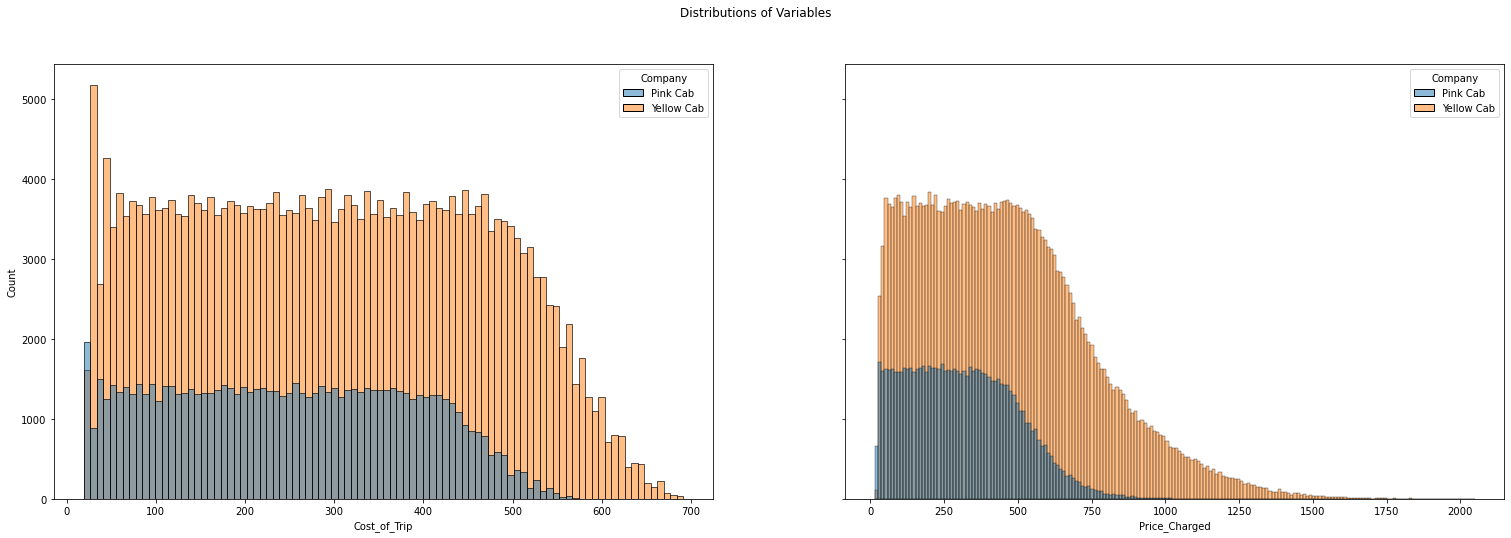

In [32]:
#The KDE curves and distribution plots of selected variables related to Cab Firms. 

fig,axes = plt.subplots(1, 2 , figsize=(26,8), sharey=True)
fig.suptitle('Distributions of Variables')
sns.histplot(ax=axes[0], data=master_data , x='Cost_of_Trip' , kde = False , hue="Company")
sns.histplot(ax=axes[1], data=master_data , x='Price_Charged' , kde = False , hue="Company")


<AxesSubplot:xlabel='KM_Travelled', ylabel='Count'>

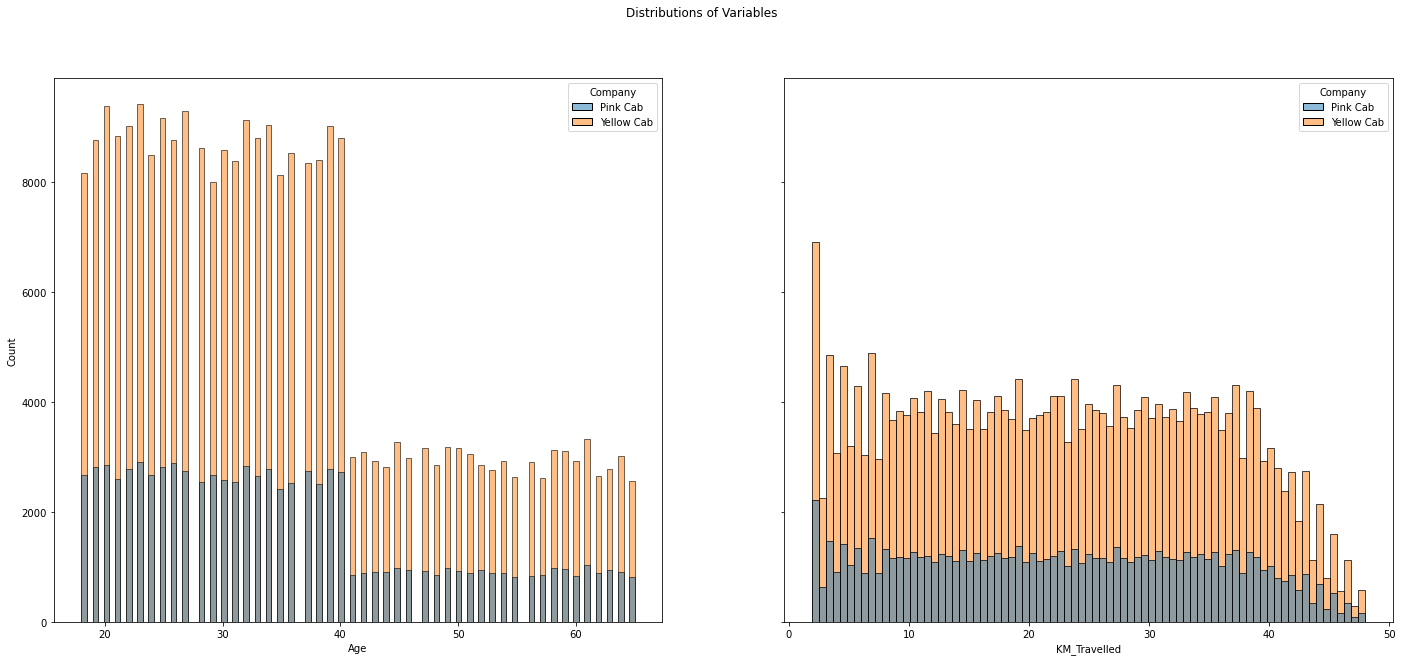

In [33]:
#The KDE curves and distribtion plots of selected variables related to Cab Firms.
fig,axes = plt.subplots(1, 2 ,figsize=(24,10), sharey=True)
fig.suptitle('Distributions of Variables')
sns.histplot(ax=axes[0],data=master_data , x='Age' , kde = False , hue="Company")
sns.histplot(ax=axes[1], data=master_data , x='KM_Travelled' , kde = False , hue="Company")


<AxesSubplot:xlabel='Users', ylabel='Count'>

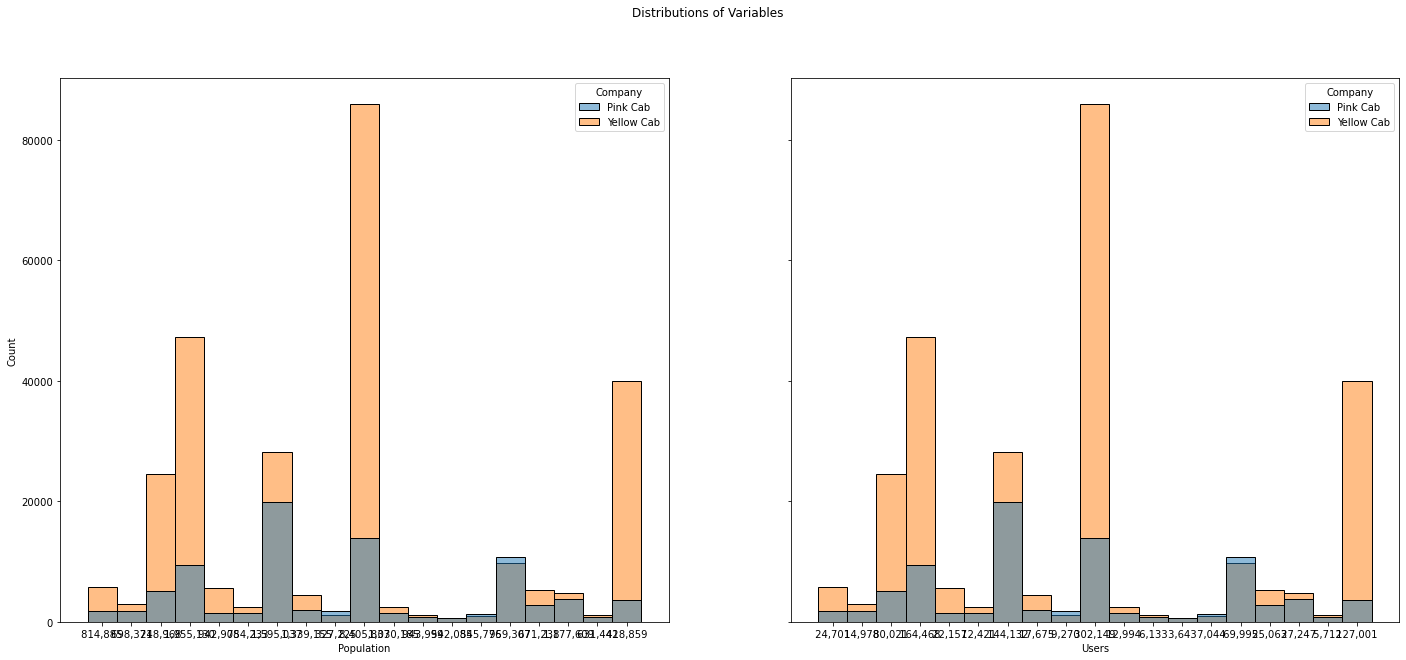

In [34]:
#The KDE curves and distribtion plots of selected variables related to Cab Firms.

fig,axes = plt.subplots(1, 2 , figsize=(24 ,10), sharey=True)
fig.suptitle('Distributions of Variables')
sns.histplot(ax=axes[0], data=master_data , x='Population' , kde = False , hue="Company")
sns.histplot(ax=axes[1], data=master_data , x='Users' , kde = False , hue="Company")


Text(0, 0.5, 'Yellow Cab')

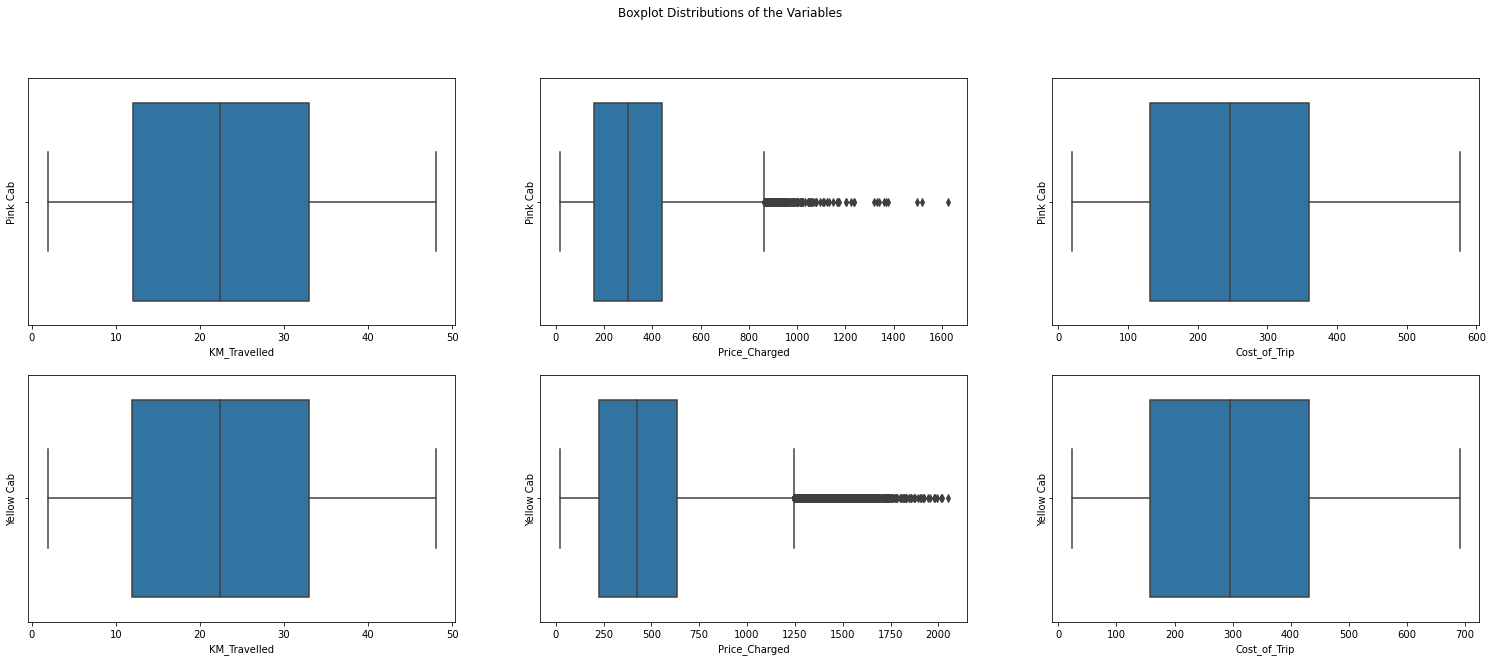

In [35]:
#Boxplot distributions of the desired variables were drawn.

fig,axes = plt.subplots(2, 3, figsize=(26, 10), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables')

sns.boxplot(ax=axes[0,0], x='KM_Travelled' ,  data=Pink_Data_sel ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,1], x='Price_Charged' , data= Pink_Data_sel  ) .set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,2], x='Cost_of_Trip' ,  data= Pink_Data_sel ).set_ylabel("Pink Cab")

sns.boxplot(ax=axes[1,0], x='KM_Travelled' ,  data= Yellow_Data_sel ).set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,1], x='Price_Charged' , data= Yellow_Data_sel  ) .set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,2], x='Cost_of_Trip' ,  data= Yellow_Data_sel ).set_ylabel("Yellow Cab")



<AxesSubplot:>

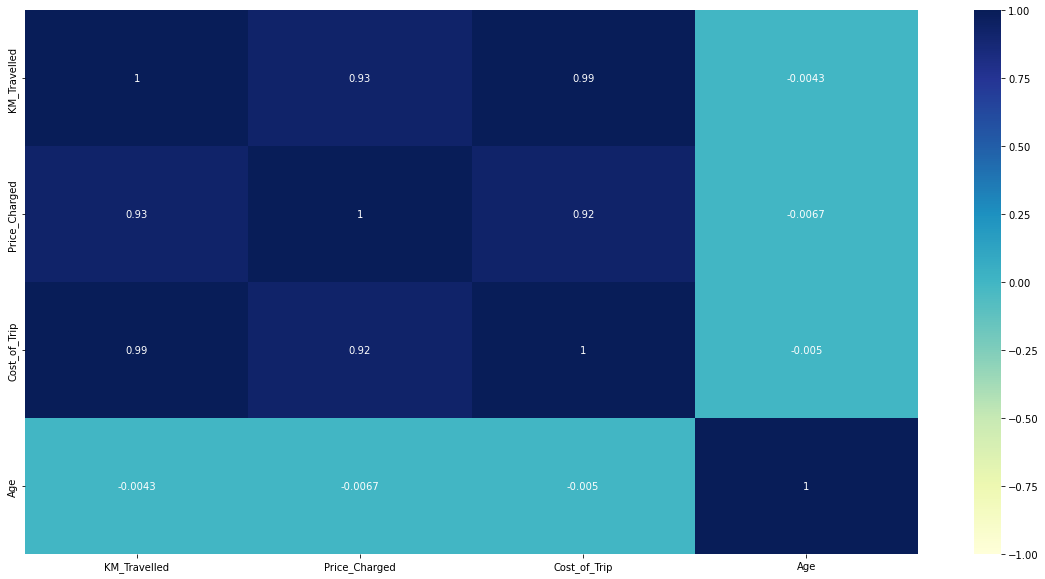

In [44]:
# Heatmap of the correlation of MasterData features for Pink Cab Firm.

Pink_Cab_Corr = Pink_Data_sel.corr()
plt.figure(figsize=(20,10))
sns.heatmap(Pink_Cab_Corr,annot=True,vmin=-1,vmax=1,cmap='YlGnBu')


<AxesSubplot:>

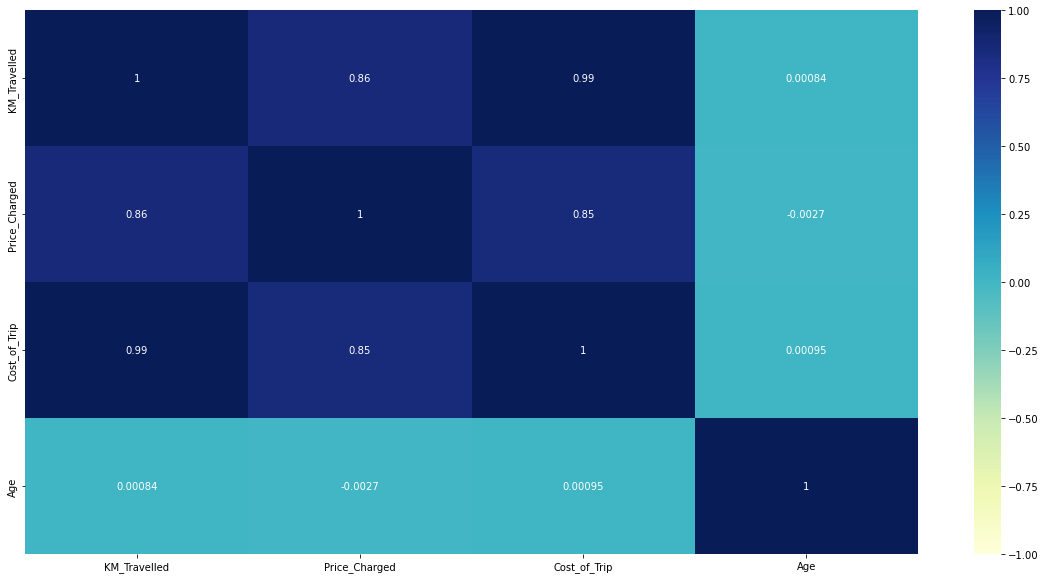

In [45]:
# Heatmap of the correlation of MasterData features for Pink Cab Firm.

Yellow_Cab_Corr = Yellow_Data_sel.corr()
plt.figure(figsize=(20,10))
sns.heatmap(Yellow_Cab_Corr,annot=True,vmin=-1,vmax=1,cmap='YlGnBu')


Text(0.5, 1.0, 'KM_Travelled  - Cost_of_Trip')

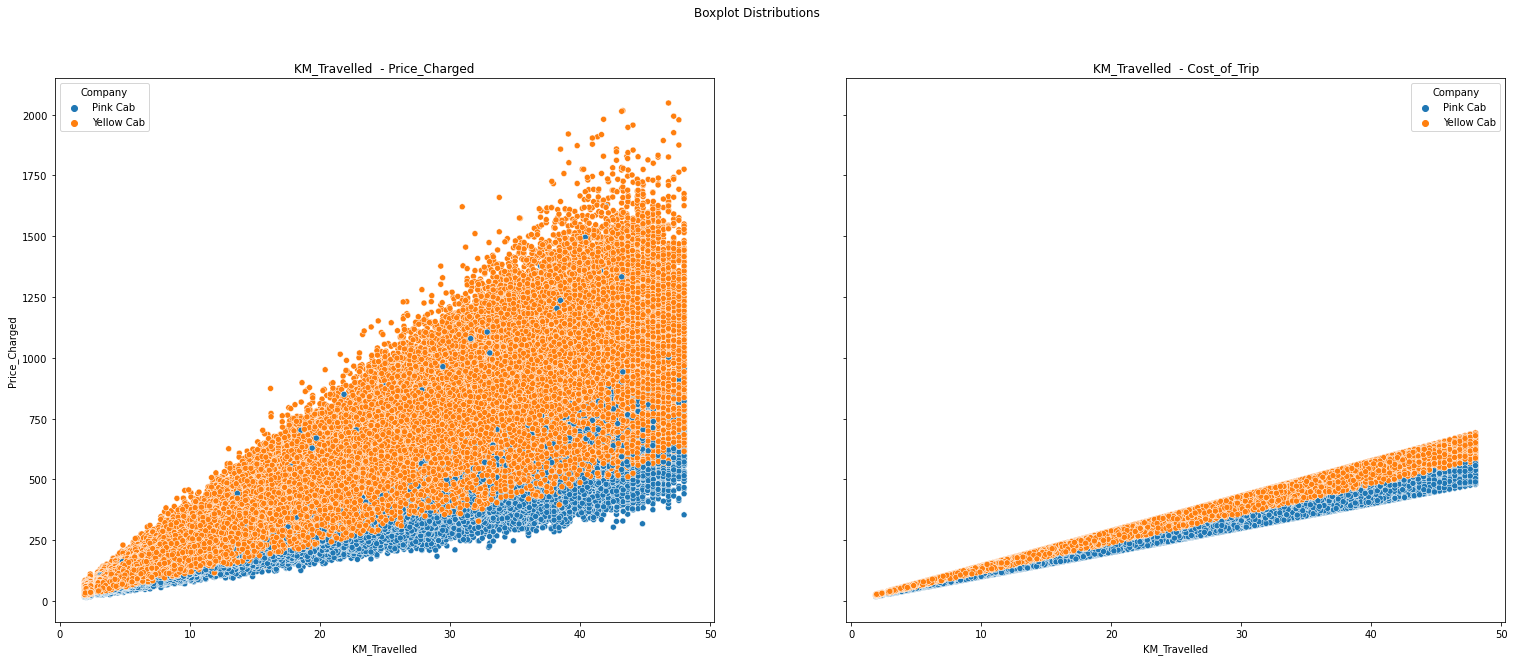

In [37]:
# Below are visualized scatter plots of MasterData features to see correlations between them if exists

fig,axes = plt.subplots(1, 2, figsize=(26, 10), sharey=True)
fig.suptitle('Boxplot Distributions')
sns.scatterplot(ax=axes[0],data=master_data, x='KM_Travelled', y='Price_Charged' , hue="Company"  ).set_title("KM_Travelled  - Price_Charged")
sns.scatterplot(ax=axes[1],data=master_data, x='KM_Travelled', y='Cost_of_Trip' , hue="Company").set_title("KM_Travelled  - Cost_of_Trip")


Text(0.5, 1.0, 'Price_Charged - Cost_of_Trip')

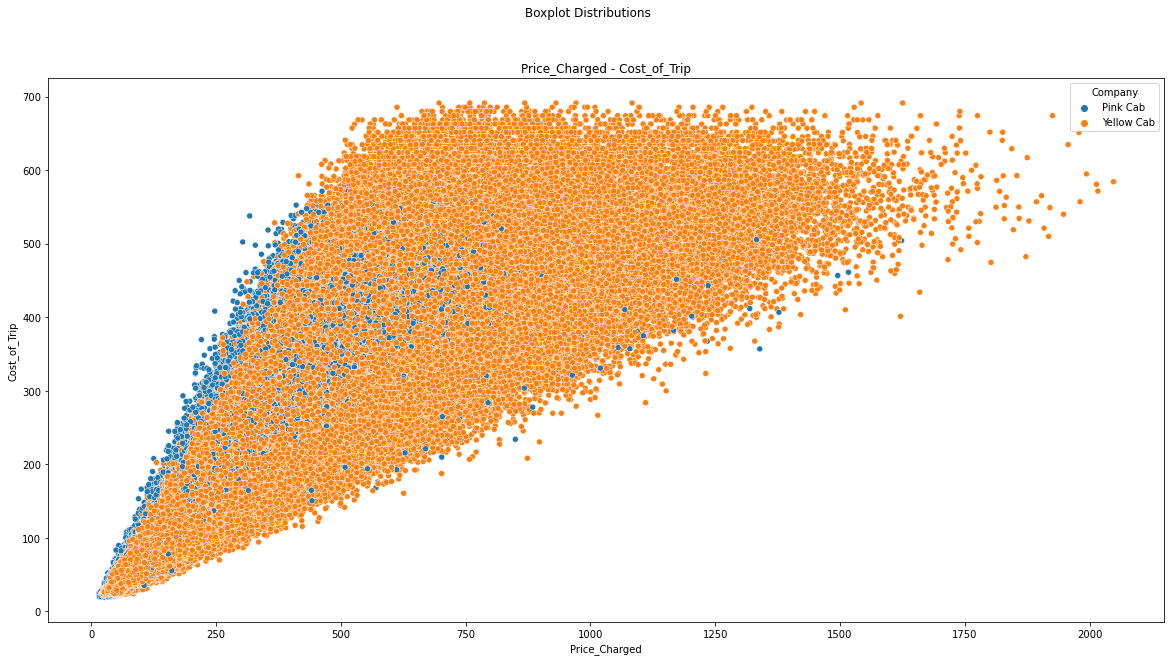

In [78]:
# Below are visualized scatter plots of MasterData features to see correlations between them if exists

fig,axes = plt.subplots(figsize=(20, 10), sharey=True)
fig.suptitle('Boxplot Distributions')
sns.scatterplot(data=master_data, x='Price_Charged', y='Cost_of_Trip' , hue="Company").set_title("Price_Charged - Cost_of_Trip")


Text(0.5, 1.0, 'Population  - Users')

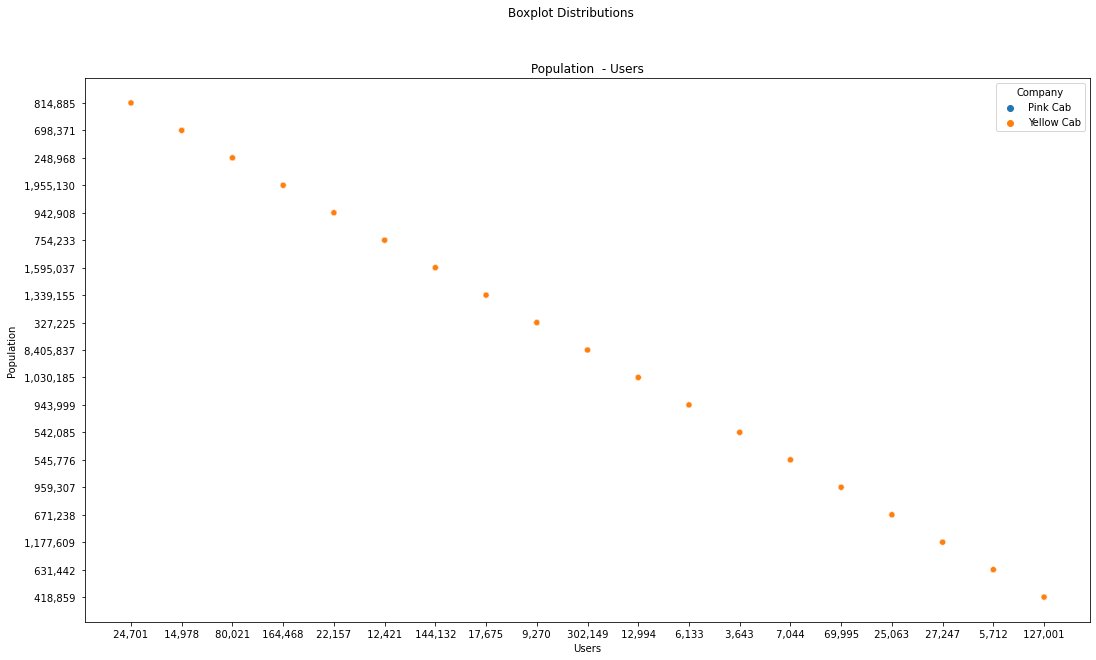

In [38]:
# Below are visualized scatter plots of MasterData features to see correlations between them if exists

fig,axes = plt.subplots(figsize=(18, 10), sharey=True)
fig.suptitle('Boxplot Distributions')
sns.scatterplot(data=master_data, x='Users', y='Population' , hue="Company"  ).set_title("Population  - Users")


Text(0.5, 1.0, 'Users - Price_Charged')

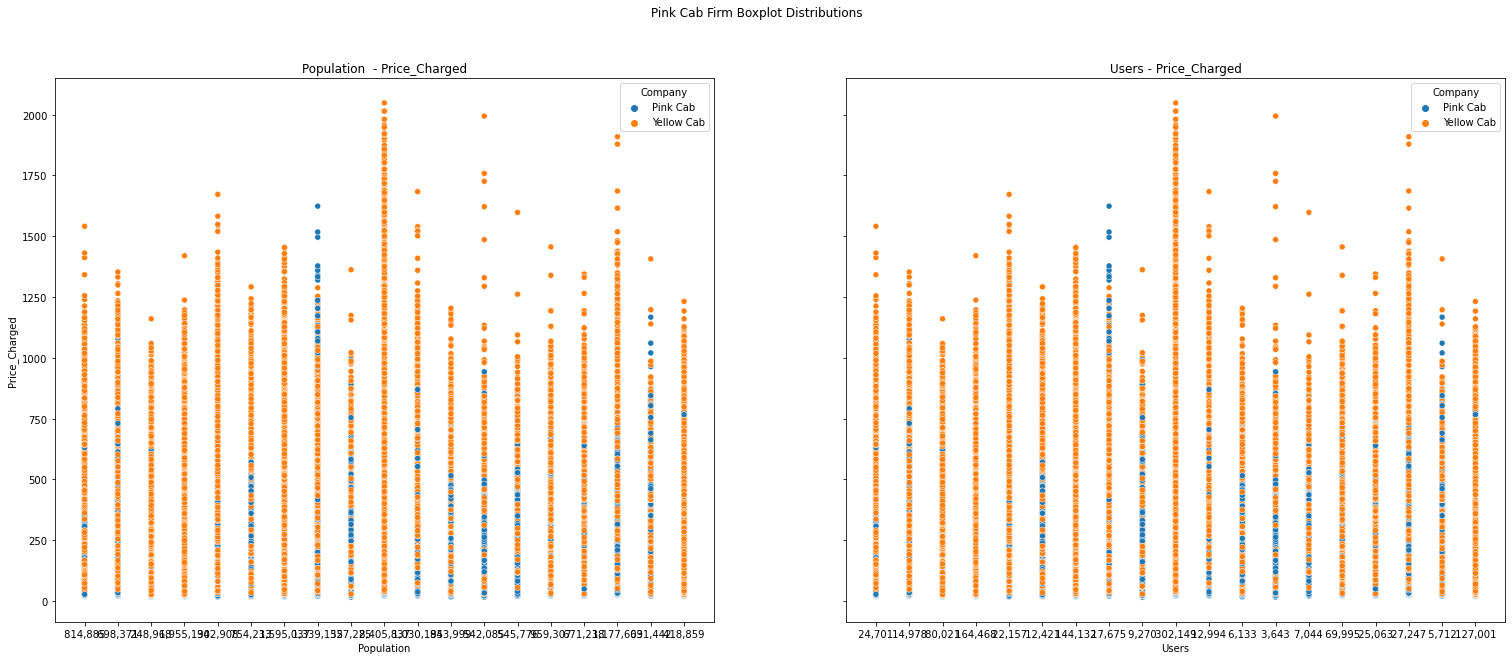

In [39]:
# Below are visualized scatter plots of MasterData features to see correlations between them if exists

fig,axes = plt.subplots(1, 2, figsize=(26, 10), sharey=True)
fig.suptitle('Pink Cab Firm Boxplot Distributions')
sns.scatterplot(ax=axes[0],data=master_data, x='Population', y='Price_Charged' , hue="Company").set_title("Population  - Price_Charged")
sns.scatterplot(ax=axes[1],data=master_data, x='Users', y='Price_Charged' , hue="Company").set_title("Users - Price_Charged")


From the above analysis, it follows that it is better to invest with Yellow Cab company.